## 1.K-近邻
我们首先使用电影分类讲解K-近邻算法的基本概念，然后学习如何在其他系统上使用K-近邻算法。

### 1.1 导入数据

In [1]:
import numpy as np
import operator

def createDataSet():
    # 4个样本数据
    group = np.array([[1.0,1.1],
                     [1.0,1.0],
                     [0,0],
                     [0,0.1]])
    # 对应4个分类标签
    labels = ['A','A','B','B']
    return group, labels

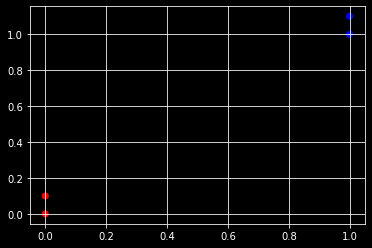

In [2]:
import matplotlib.pyplot as plt

data = [[1.0,1.0,0,0],[1.1,1.0,0,0.1]]
fig, ax = plt.subplots()

ax.scatter(data[0], data[1],c=['blue','blue','red','red'])
ax.grid(which='both',axis='both')

plt.show()

### 1.2 实施简单KNN分类算法
伪代码如下：

对未知类别的数据集中的每个点执行以下操作：

1. 计算已知类别的数据集中的点到当前点的距离

2. 按照距离递增次序排序

3. 选取与当前点距离最小的K个点

4. 确定前K个点的类别出现频率

5. 返回这K个点中出现频率最高的类别作为当前点的预测类别

In [3]:
def classify0(inX, dataSet, labels, k):
    # 数据行数
    dataSetSize = dataSet.shape[0]
    # 复制数据行数的inX 相减
    diffMat = np.tile(inX, (dataSetSize,1)) - dataSet
    # 相减后平方
    sqDiffMat = diffMat ** 2
    # 按行求和
    sqDistance = np.sum(sqDiffMat,axis=1)
    # 开方
    distance = sqDistance ** 0.5
    # 生成排序后的索引值
    sortedDistIndicies = distance.argsort()
    classCount = {}
    # 距离最近的前K个数据点分类出现频次统计
    for i in range(k):
        voteLabel = labels[sortedDistIndicies[i]]
        classCount[voteLabel] = classCount.get(voteLabel,0) + 1
    # print(classCount)
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]

# TODO: 1.加入参数，指定距离算法 
# 测试
group, labels = createDataSet()
classify0([0.1, 0.9], group, labels, 3)

'B'

### 1.3 电影分类
训练数据：

|电影名称|打斗镜头|接吻镜头|电影类型|
|---|---|---|---|
|California Man|3|104|爱情片|
|He's Not Really into Dues|2|100|爱情片|
|Beautiful Woman|1|81|爱情片|
|Kevin Longblade|101|10|动作片|
|Robo Slayer 3000|99|5|动作片|
|Amped Ⅱ|98|2|动作片|

预测数据：

|电影名称|打斗镜头|接吻镜头|电影类型|
|---|---|---|---|
|**|18|90|？|

In [19]:
def createDataSet():
    group = np.array([[3,104],[2,100],[1,81],[101,10],[99,5],[98,2]])
    labels = ['爱情片','爱情片','爱情片','动作片','动作片','动作片']

    return group, labels
createDataSet()

group, labels = createDataSet()
# group
classify0([18, 90], group, labels, 2)

'爱情片'

#### 绘图

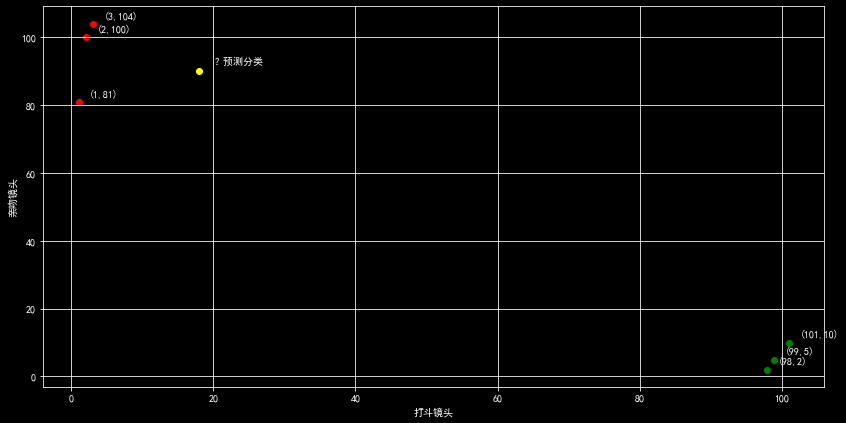

In [27]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig, ax = plt.subplots(figsize=(14,7))

x_a = group[0:3,0]
y_a = group[0:3,1]
x_b = group[3:,0]
y_b = group[3:,1]

ax.scatter(x=x_a, y=y_a, c='red')
ax.scatter(x=x_b, y=y_b, c='green')
ax.scatter(x=18,y=90,c='yellow')

ax.set_xlabel('打斗镜头')
ax.set_ylabel('亲吻镜头')
ax.grid()

for i in range(group.shape[0]):
    dot = group[i,:]
    ax.annotate(text='(%s,%s)'%(dot[0], dot[1]), xy=(dot[0], dot[1]), xytext=(dot[0]+1.5, dot[1]+1.5))

ax.annotate(text='？预测分类',xy=(18,90),xytext=(20,92))

plt.show()

### 1.4 约会配对

特征：【‘每年获得的飞行常客里程数’，‘玩视频游戏所耗时间的百分比’，‘每周消费的冰淇淋公升数’】

标签：【‘不喜欢’，‘一般’，‘喜欢’】
```python
Features=['flight','game','ice']
Labels=['didntLike','smallDoses','largeDoses']
```

